   # Credit Card Approval Prediction

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# A)

In [8]:
app_df = pd.read_csv('application_record.csv')


## UNDERSTANDING THE DATASET


In [9]:
app_df.head(5)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [10]:
column_name_mapping = {
    'CODE_GENDER': 'Gender',
    'FLAG_OWN_CAR': 'Own_car',
    'FLAG_OWN_REALTY': 'Own_property',
    'CNT_CHILDREN': 'Children_cnt',
    'AMT_INCOME_TOTAL': 'Income',
    'NAME_INCOME_TYPE': 'Income_source',
    'NAME_EDUCATION_TYPE': 'Education',
    'NAME_FAMILY_STATUS': 'Family_status',
    'NAME_HOUSING_TYPE': 'Housing_type',
    'DAYS_BIRTH': 'Age',
    'DAYS_EMPLOYED': 'Experience',
    'FLAG_MOBIL': 'Mobile',
    'FLAG_WORK_PHONE': 'Work_phone',
    'FLAG_PHONE': 'Phone',
    'FLAG_EMAIL': 'Email',
    'OCCUPATION_TYPE': 'Occupation_type',
    'CNT_FAM_MEMBERS': 'Family_size'
}

app_df.rename(columns=column_name_mapping, inplace=True)

app_df.head(5)

ID Gender Own_car Own_property  Children_cnt    Income  \
0  5008804      M       Y            Y             0  427500.0   
1  5008805      M       Y            Y             0  427500.0   
2  5008806      M       Y            Y             0  112500.0   
3  5008808      F       N            Y             0  270000.0   
4  5008809      F       N            Y             0  270000.0   

          Income_source                      Education         Family_status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

        Housing_type    Age  Experience  Mobile  Work_phone  Phone  Email  \
0   Rented apartment -12005       -4542       1           1      0      0   
1   Rented apartment -12005       -4542       1           1      0      0   
2  House / apartment -21474       -1134       1           0      0      0   
3  House / apartment -19110       -3051       1           0      1      1   
4  House / apartment -19110       -3051       1           0      1      1   

  Occupation_type  Family_size  
0             NaN          2.0  
1             NaN          2.0  
2  Security staff          2.0  
3     Sales staff          1.0  
4     Sales staff          1.0

In [11]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               438557 non-null  int64  
 1   Gender           438557 non-null  object 
 2   Own_car          438557 non-null  object 
 3   Own_property     438557 non-null  object 
 4   Children_cnt     438557 non-null  int64  
 5   Income           438557 non-null  float64
 6   Income_source    438557 non-null  object 
 7   Education        438557 non-null  object 
 8   Family_status    438557 non-null  object 
 9   Housing_type     438557 non-null  object 
 10  Age              438557 non-null  int64  
 11  Experience       438557 non-null  int64  
 12  Mobile           438557 non-null  int64  
 13  Work_phone       438557 non-null  int64  
 14  Phone            438557 non-null  int64  
 15  Email            438557 non-null  int64  
 16  Occupation_type  304354 non-null  obje

In [12]:
missing_values = app_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
ID                      0
Gender                  0
Own_car                 0
Own_property            0
Children_cnt            0
Income                  0
Income_source           0
Education               0
Family_status           0
Housing_type            0
Age                     0
Experience              0
Mobile                  0
Work_phone              0
Phone                   0
Email                   0
Occupation_type    134203
Family_size             0
dtype: int64


In [13]:
categorical_columns = app_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(app_df[col].value_counts())


Unique values in Gender:
F    294440
M    144117
Name: Gender, dtype: int64

Unique values in Own_car:
N    275459
Y    163098
Name: Own_car, dtype: int64

Unique values in Own_property:
Y    304074
N    134483
Name: Own_property, dtype: int64

Unique values in Income_source:
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: Income_source, dtype: int64

Unique values in Education:
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: Education, dtype: int64

Unique values in Family_status:
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: Family_status, dtype: int64

Unique values in Housing_type:
House / apartment   

In [14]:
# Displaying the list of numerical columns

numerical_columns = app_df.select_dtypes(include=['int64', 'float64'])

print(numerical_columns.columns)

Index(['ID', 'Children_cnt', 'Income', 'Age', 'Experience', 'Mobile',
       'Work_phone', 'Phone', 'Email', 'Family_size'],
      dtype='object')


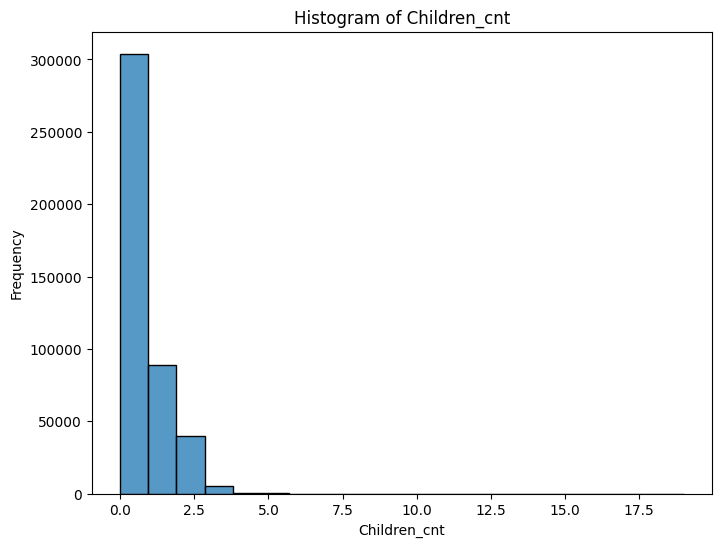

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Children_cnt', bins=20)
plt.title("Histogram of Children_cnt")
plt.xlabel("Children_cnt")
plt.ylabel("Frequency")
plt.show()

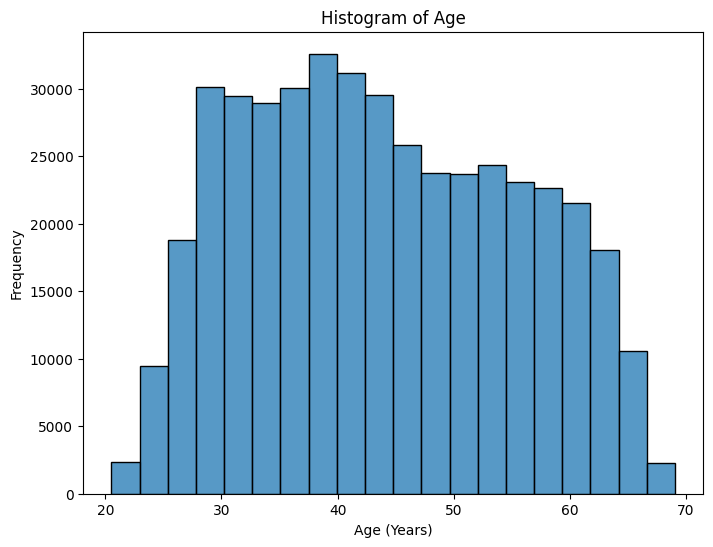

In [16]:
app_df['Age'] = app_df['Age'] / -365

# Create and display a histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Age', bins=20)
plt.title("Histogram of Age")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()

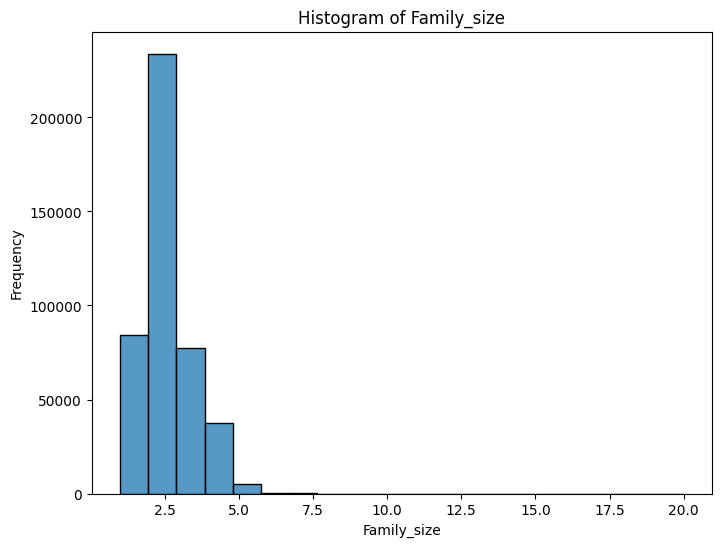

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=app_df, x='Family_size', bins=20)
plt.title("Histogram of Family_size")
plt.xlabel("Family_size")
plt.ylabel("Frequency")
plt.show()

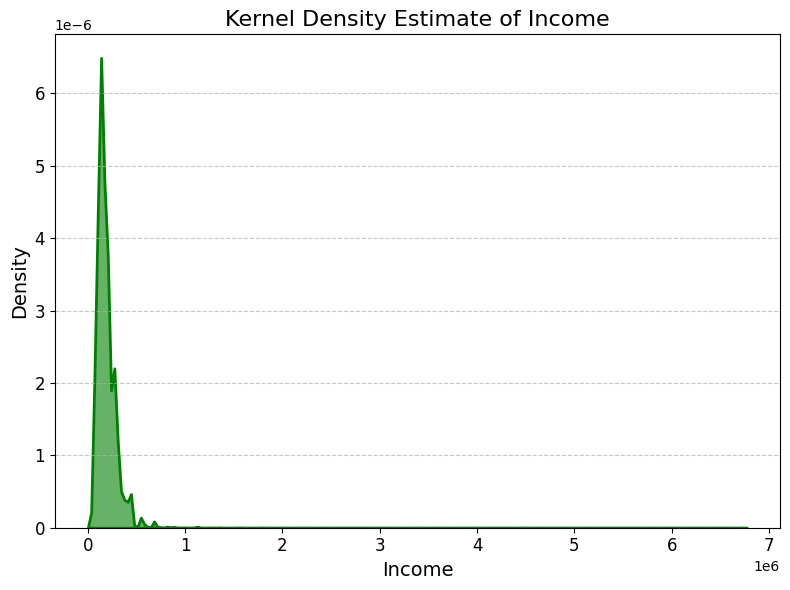

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=app_df, x='Income', fill=True, color='green', linewidth=2, alpha=0.6)

plt.title("Kernel Density Estimate of Income", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

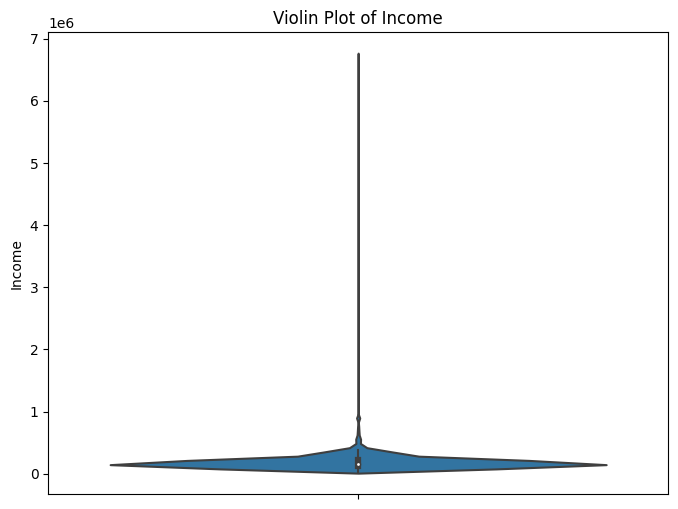

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=app_df, y='Income')
plt.title("Violin Plot of Income")
plt.ylabel("Income")
plt.show()

/tmp/ipykernel_9358/3228792583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = app_df.corr()


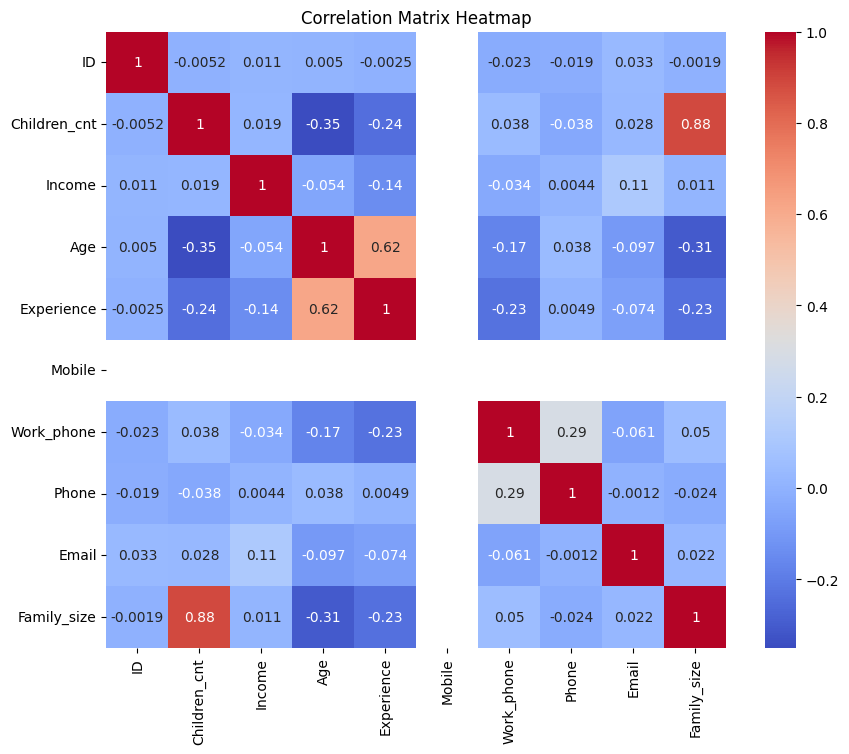

In [20]:
correlation_matrix = app_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

## PRE-PROCESSING

### Handling missing values

In [21]:
print(missing_values)

ID                      0
Gender                  0
Own_car                 0
Own_property            0
Children_cnt            0
Income                  0
Income_source           0
Education               0
Family_status           0
Housing_type            0
Age                     0
Experience              0
Mobile                  0
Work_phone              0
Phone                   0
Email                   0
Occupation_type    134203
Family_size             0
dtype: int64


In [22]:
occupation_counts = app_df['Occupation_type'].value_counts(dropna=False)
print(occupation_counts)

NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: Occupation_type, dtype: int64


In [23]:
flag_value = 'Unknown'  
app_df['Occupation_type'].fillna(flag_value, inplace=True)

app_df.head(5)

ID Gender Own_car Own_property  Children_cnt    Income  \
0  5008804      M       Y            Y             0  427500.0   
1  5008805      M       Y            Y             0  427500.0   
2  5008806      M       Y            Y             0  112500.0   
3  5008808      F       N            Y             0  270000.0   
4  5008809      F       N            Y             0  270000.0   

          Income_source                      Education         Family_status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

        Housing_type        Age  Experience  Mobile  Work_phone  Phone  Email  \
0   Rented apartment  32.890411       -4542       1           1      0      0   
1   Rented apartment  32.890411       -4542       1           1      0      0   
2  House / apartment  58.832877       -1134       1           0      0      0   
3  House / apartment  52.356164       -3051       1           0      1      1   
4  House / apartment  52.356164       -3051       1           0      1      1   

  Occupation_type  Family_size  
0         Unknown          2.0  
1         Unknown          2.0  
2  Security staff          2.0  
3     Sales staff          1.0  
4     Sales staff          1.0

In [24]:
app_df['Mobile'].nunique()

1

 The column "Children_cnt" is highly correlated with the column "Family_size".
 The column "Mobile" has only one value in it

In [25]:
app_df.drop(['Children_cnt','Mobile'], axis = 1, inplace= True)

In [26]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               438557 non-null  int64  
 1   Gender           438557 non-null  object 
 2   Own_car          438557 non-null  object 
 3   Own_property     438557 non-null  object 
 4   Income           438557 non-null  float64
 5   Income_source    438557 non-null  object 
 6   Education        438557 non-null  object 
 7   Family_status    438557 non-null  object 
 8   Housing_type     438557 non-null  object 
 9   Age              438557 non-null  float64
 10  Experience       438557 non-null  int64  
 11  Work_phone       438557 non-null  int64  
 12  Phone            438557 non-null  int64  
 13  Email            438557 non-null  int64  
 14  Occupation_type  438557 non-null  object 
 15  Family_size      438557 non-null  float64
dtypes: float64(3), int64(5), object(8)
mem

### Encoding

In [27]:
# Display the list of categorical columns

categorical_columns = app_df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns.tolist())

['Gender', 'Own_car', 'Own_property', 'Income_source', 'Education', 'Family_status', 'Housing_type', 'Occupation_type']


In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Own_car', 'Own_property', 'Income_source', 'Education', 'Family_status', 'Housing_type', 'Occupation_type']

label_encoder = LabelEncoder()

for col in categorical_columns:
    app_df[col] = label_encoder.fit_transform(app_df[col])

app_df.head()

ID  Gender  Own_car  Own_property    Income  Income_source  Education  \
0  5008804       1        1             1  427500.0              4          1   
1  5008805       1        1             1  427500.0              4          1   
2  5008806       1        1             1  112500.0              4          4   
3  5008808       0        0             1  270000.0              0          4   
4  5008809       0        0             1  270000.0              0          4   

   Family_status  Housing_type        Age  Experience  Work_phone  Phone  \
0              0             4  32.890411       -4542           1      0   
1              0             4  32.890411       -4542           1      0   
2              1             1  58.832877       -1134           0      0   
3              3             1  52.356164       -3051           0      1   
4              3             1  52.356164       -3051           0      1   

   Email  Occupation_type  Family_size  
0      0               17          2.0  
1      0               17          2.0  
2      0               16          2.0  
3      1               14          1.0  
4      1               14          1.0

In [29]:
app_df['Experience']=app_df['Experience']/-365

In [30]:
import math

app_df['Age'] = app_df['Age'].apply(lambda x: int(math.floor(x)))
app_df['Experience'] = app_df['Experience'].apply(lambda x: int(math.floor(x)))

## Feature Scaling

--Numerical columns with binary values do not require scaling. There is one income column which might need it. Whether to scale it or not will be decide on TRY AND ERROR METHOD based on model performance

## Outliers detection and handling

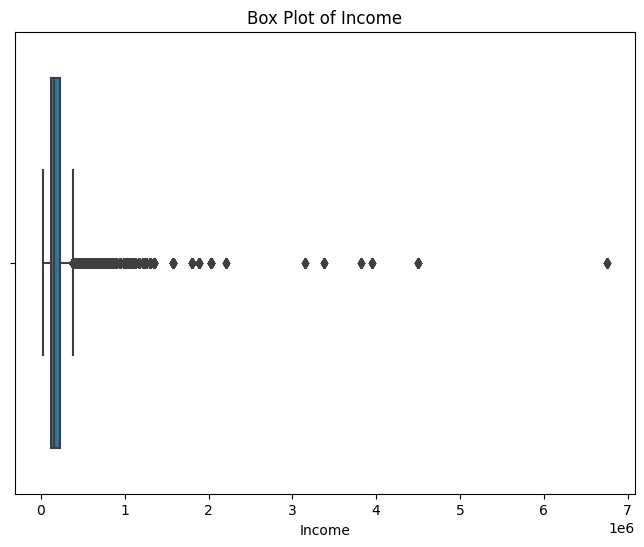

In [31]:
column_to_plot = 'Income'

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

In [32]:
column_to_analyze = 'Income'

Q1 = app_df[column_to_analyze].quantile(0.25)
Q3 = app_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers_count = app_df[(app_df[column_to_analyze] > upper_bound) | (app_df[column_to_analyze] < lower_bound)].shape[0]

print("Number of outliers in", column_to_analyze, ":", outliers_count)

Number of outliers in Income : 19108


In [33]:
print(app_df['Income'].max())

6750000.0


In [34]:
count_above_threshold = app_df[app_df[column_to_analyze] > upper_bound].shape[0]

print("Number of records with income > Upper bound:", count_above_threshold)

Number of records with income > Upper bound: 19108


#### There are less than 1% values as outliers in the income column. These can be removed

In [35]:
# Remove outliers
app_df = app_df[(app_df['Income'] >= lower_bound) & (app_df['Income'] <= upper_bound)]

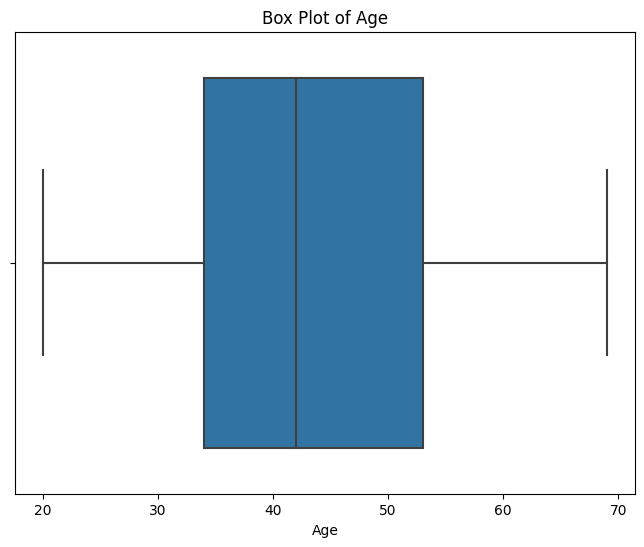

In [36]:
column_to_plot = 'Age'

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

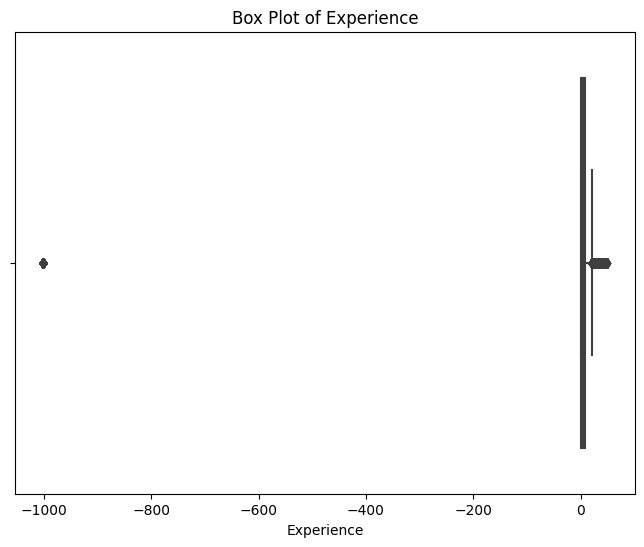

In [37]:
column_to_plot = 'Experience'

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=app_df, x=column_to_plot)
plt.title("Box Plot of " + column_to_plot)
plt.xlabel(column_to_plot)
plt.show()

In [38]:
column_to_analyze = 'Experience'

Q1 = app_df[column_to_analyze].quantile(0.25)
Q3 = app_df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers_count = app_df[(app_df[column_to_analyze] > upper_bound) | (app_df[column_to_analyze] < lower_bound)].shape[0]

print("Number of outliers in", column_to_analyze, ":", outliers_count)

Number of outliers in Experience : 91513


In [39]:
count_below_threshold = app_df[app_df['Experience'] < 0].shape[0]

print("Number of records with income < 0:", count_below_threshold)

Number of records with income < 0: 73802


In [40]:
column_to_handle = 'Experience'

min_cap_value = 0

app_df[column_to_handle] = app_df[column_to_handle].apply(lambda x: min_cap_value if x < min_cap_value else x)

##### Experience cannot be below 0. So keeping it as threshold, it is found that almost 73800 values are outliers

## Feature Engineering

-- As a part of Feature Transformations, the columns AGE and EXPERIENCE are already created in the prior process.

# B)

In [41]:
credit_df = pd.read_csv('credit_record.csv')

In [42]:
credit_df.head(5)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [43]:
credit_df.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

In [44]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [45]:
credit_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [46]:
credit_df['STATUS'].nunique()
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [47]:
credit_df['ID'].nunique()

45985

In [48]:
column_name_mapping = {
    'MONTHS_BALANCE': 'Due_past',
    'STATUS': 'Status'
}

credit_df.rename(columns=column_name_mapping, inplace=True)

credit_df.head(5)

ID  Due_past Status
0  5001711         0      X
1  5001711        -1      0
2  5001711        -2      0
3  5001711        -3      0
4  5001712         0      C

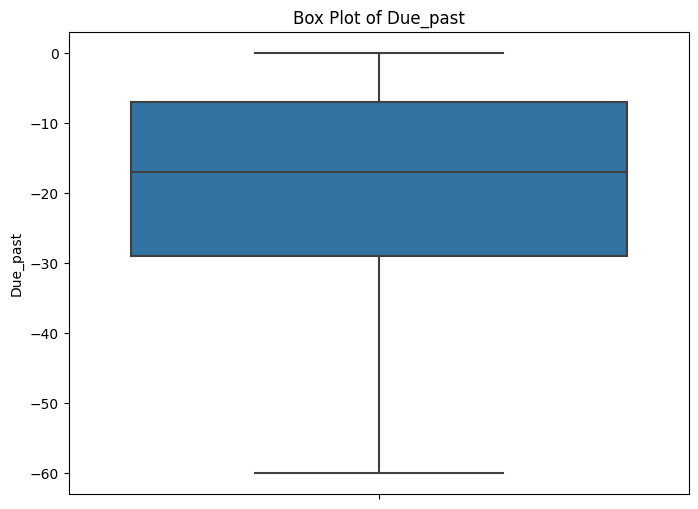

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_df, y='Due_past')
plt.title("Box Plot of Due_past")
plt.ylabel("Due_past")
plt.show()

In [50]:
credit_df['STATUS_BINARY'] = credit_df['Status']
credit_df = credit_df.replace({'STATUS_BINARY' :{'C' : 'Good','X' : 'Good','0' : 'Bad', '1' : 'Bad','2' : 'Bad','3' : 'Bad','4' : 'Bad','5' : 'Bad'}})
result_df = credit_df.value_counts(subset=['ID', 'STATUS_BINARY']).unstack(fill_value=0).reset_index()


In [51]:
credit_df['Due_past'].min()

-60

In [52]:
result_df.loc[(result_df['Good'] / result_df['Bad'] >= 1), 'Status'] = 1
result_df.loc[(result_df['Good'] / result_df['Bad'] < 1 ), 'Status'] = 0
result_df['Status'] = result_df['Status'].astype(int)

In [53]:
result_df.head(5)

STATUS_BINARY       ID  Bad  Good  Status
0              5001711    3     1       0
1              5001712   10     9       0
2              5001713    0    22       1
3              5001714    0    15       1
4              5001715    0    60       1

In [54]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      45985 non-null  int64
 1   Bad     45985 non-null  int64
 2   Good    45985 non-null  int64
 3   Status  45985 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


## MERGING THE DATASET

In [55]:
df = app_df.merge(result_df, how='inner', on=['ID'])

In [56]:
df['Good_Rate'] = (df['Good']+1) / (df['Bad']+df['Good']+1)
df['Good_Rate'] = df['Good_Rate'].round(2) 

df.drop(['Good','Bad'],axis=1,inplace = True);

In [57]:
df['Family_size'] = df['Family_size'].astype(int)

In [58]:
df.head(4)

ID  Gender  Own_car  Own_property    Income  Income_source  Education  \
0  5008806       1        1             1  112500.0              4          4   
1  5008808       0        0             1  270000.0              0          4   
2  5008809       0        0             1  270000.0              0          4   
3  5008810       0        0             1  270000.0              0          4   

   Family_status  Housing_type  Age  Experience  Work_phone  Phone  Email  \
0              1             1   58           3           0      0      0   
1              3             1   52           8           0      1      1   
2              3             1   52           8           0      1      1   
3              3             1   52           8           0      1      1   

   Occupation_type  Family_size  Status  Good_Rate  
0               16            2       1       0.77  
1               14            1       1       0.67  
2               14            1       1       1.00  
3               14            1       1       0.79

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34928 entries, 0 to 34927
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               34928 non-null  int64  
 1   Gender           34928 non-null  int64  
 2   Own_car          34928 non-null  int64  
 3   Own_property     34928 non-null  int64  
 4   Income           34928 non-null  float64
 5   Income_source    34928 non-null  int64  
 6   Education        34928 non-null  int64  
 7   Family_status    34928 non-null  int64  
 8   Housing_type     34928 non-null  int64  
 9   Age              34928 non-null  int64  
 10  Experience       34928 non-null  int64  
 11  Work_phone       34928 non-null  int64  
 12  Phone            34928 non-null  int64  
 13  Email            34928 non-null  int64  
 14  Occupation_type  34928 non-null  int64  
 15  Family_size      34928 non-null  int64  
 16  Status           34928 non-null  int64  
 17  Good_Rate   

## Understanding the RATE column

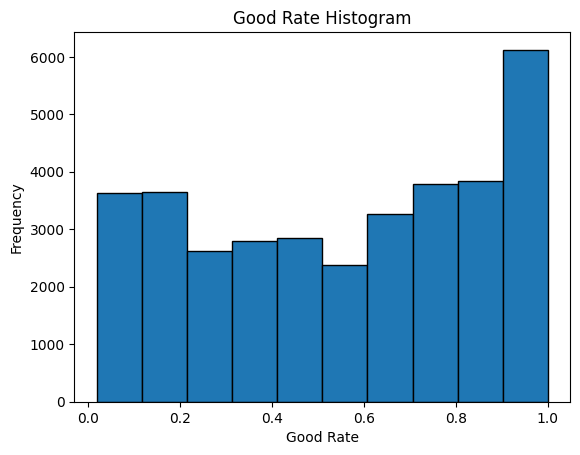

In [60]:
plt.hist(df['Good_Rate'], bins=10, edgecolor='black')
plt.title('Good Rate Histogram')
plt.xlabel('Good Rate')
plt.ylabel('Frequency')
plt.show()

In [61]:
below_threshold = df[df['Good_Rate'] < 0.30]

count_below_threshold = below_threshold.shape[0]

print("Count of values below 0.50:", count_below_threshold)

Count of values below 0.50: 9634


#  Exploratory Data Analysis (EDA) 

In [62]:
 df.describe()

ID        Gender       Own_car  Own_property         Income  \
count  3.492800e+04  34928.000000  34928.000000  34928.000000   34928.000000   
mean   5.078209e+06      0.322435      0.369761      0.669492  172742.036604   
std    4.185109e+04      0.467415      0.482747      0.470403   71227.005679   
min    5.008806e+06      0.000000      0.000000      0.000000   27000.000000   
25%    5.042022e+06      0.000000      0.000000      0.000000  117000.000000   
50%    5.074541e+06      0.000000      0.000000      1.000000  157500.000000   
75%    5.115416e+06      1.000000      1.000000      1.000000  225000.000000   
max    5.150487e+06      1.000000      1.000000      1.000000  378000.000000   

       Income_source     Education  Family_status  Housing_type           Age  \
count   34928.000000  34928.000000   34928.000000  34928.000000  34928.000000   
mean        2.413508      3.134963       1.369360      1.283154     43.261023   
std         1.727894      1.323476       0.959122      0.952799     11.585068   
min         0.000000      0.000000       0.000000      0.000000     20.000000   
25%         1.000000      1.000000       1.000000      1.000000     34.000000   
50%         4.000000      4.000000       1.000000      1.000000     42.000000   
75%         4.000000      4.000000       1.000000      1.000000     53.000000   
max         4.000000      4.000000       4.000000      5.000000     68.000000   

         Experience    Work_phone         Phone         Email  \
count  34928.000000  34928.000000  34928.000000  34928.000000   
mean       5.568140      0.226008      0.291657      0.087008   
std        6.442146      0.418250      0.454532      0.281850   
min        0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000   
50%        4.000000      0.000000      0.000000      0.000000   
75%        8.000000      0.000000      1.000000      0.000000   
max       43.000000      1.000000      1.000000      1.000000   

       Occupation_type   Family_size        Status     Good_Rate  
count     34928.000000  34928.000000  34928.000000  34928.000000  
mean         10.607306      2.193856      0.555056      0.559701  
std           5.635485      0.910462      0.496967      0.313199  
min           0.000000      1.000000      0.000000      0.020000  
25%           6.000000      2.000000      0.000000      0.250000  
50%          10.000000      2.000000      1.000000      0.600000  
75%          17.000000      3.000000      1.000000      0.830000  
max          18.000000     20.000000      1.000000      1.000000

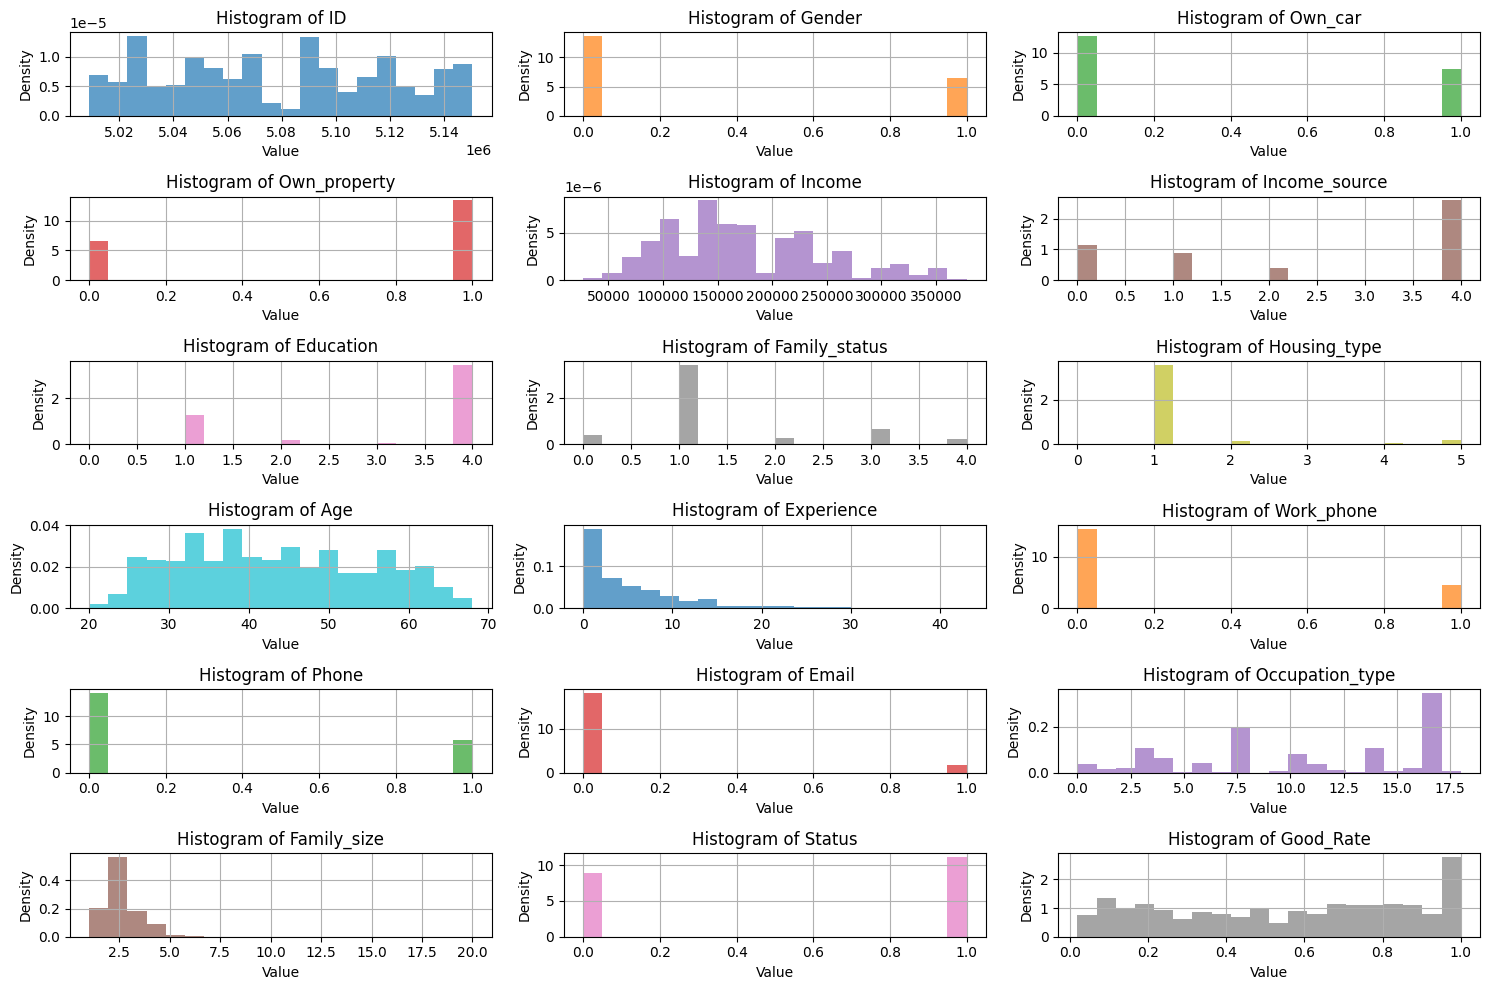

In [63]:
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

columns_to_plot = ['ID', 'Gender', 'Own_car', 'Own_property', 'Income', 'Income_source', 'Education', 'Family_status',
                   'Housing_type', 'Age', 'Experience', 'Work_phone', 'Phone', 'Email', 'Occupation_type', 'Family_size',
                   'Status', 'Good_Rate']

num_columns = len(columns_to_plot)
num_rows = (num_columns - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    df[column].hist(ax=axes[row, col], bins=20, color=colors[i], density=True, alpha=0.7)
    axes[row, col].set_title(f"Histogram of {column}")
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Density")

plt.tight_layout()

plt.show()



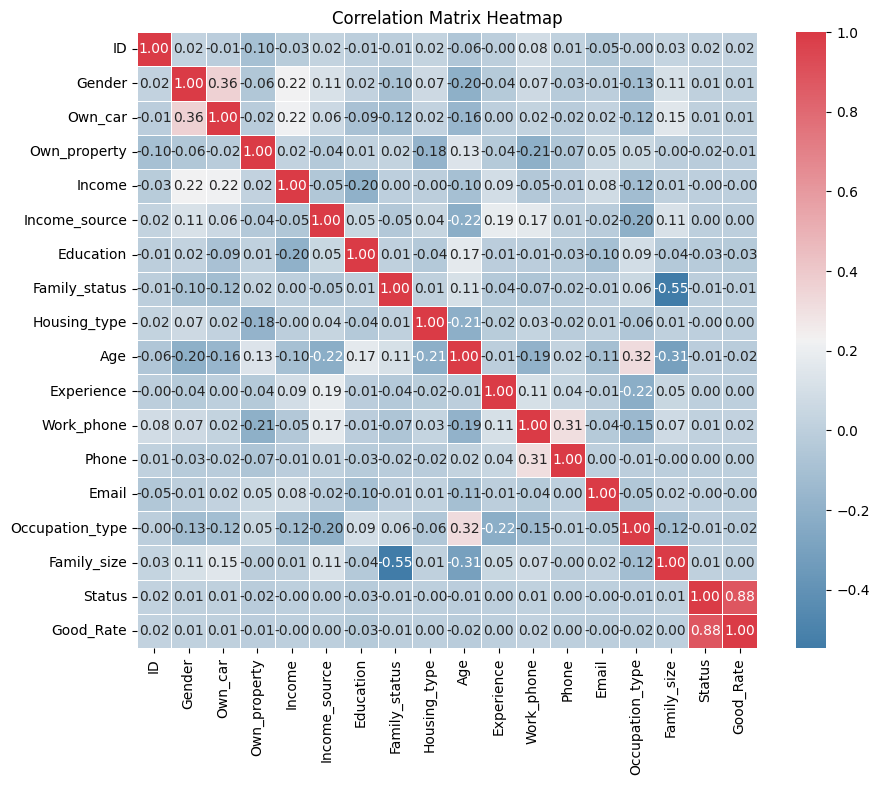

In [65]:
correlation_matrix = df.corr()

color_palette = sns.diverging_palette(240, 10, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=color_palette, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

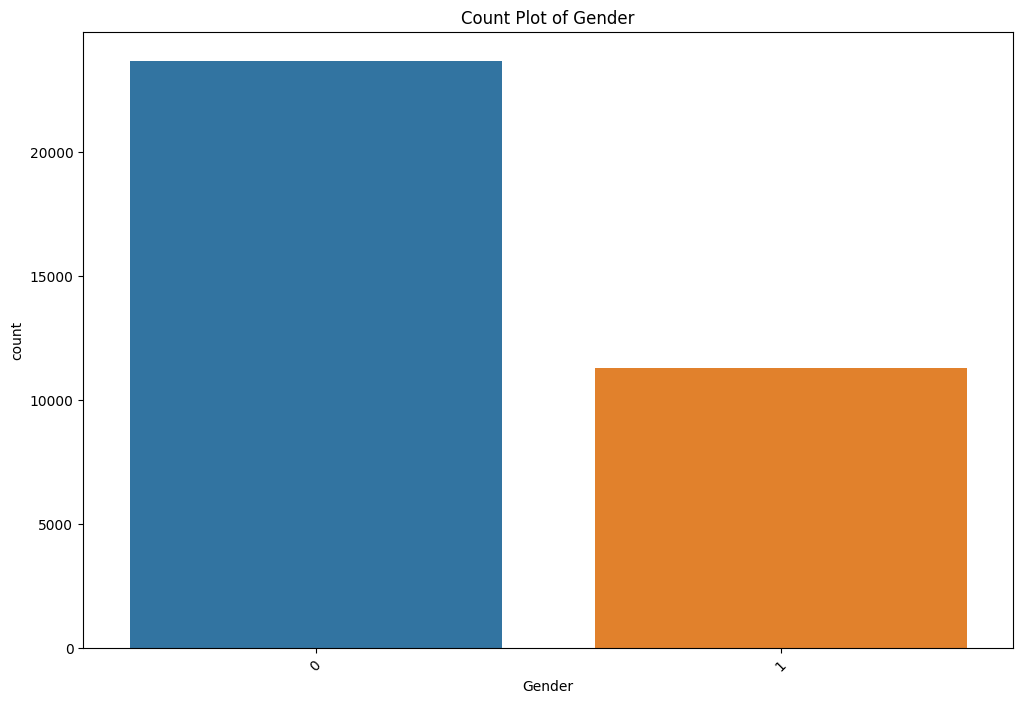

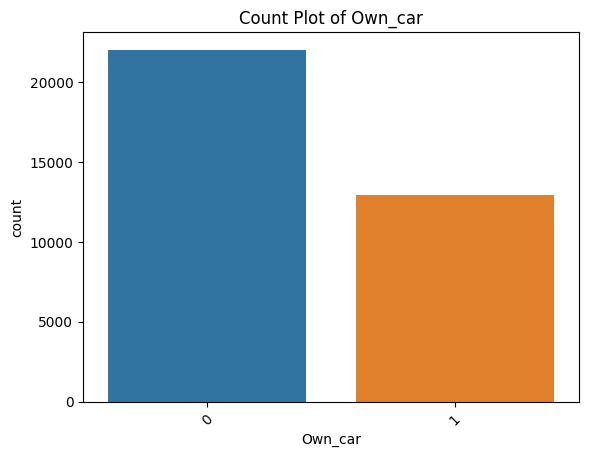

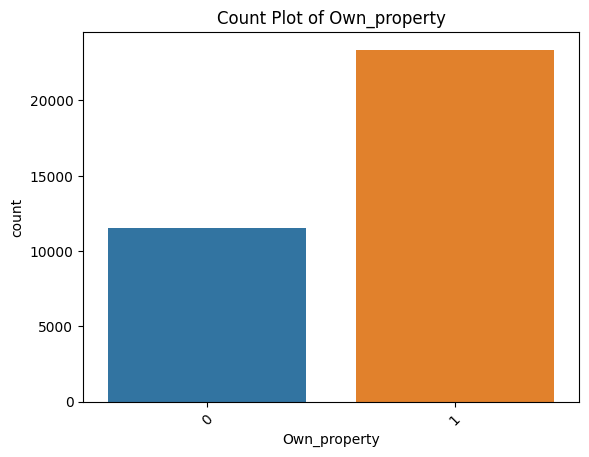

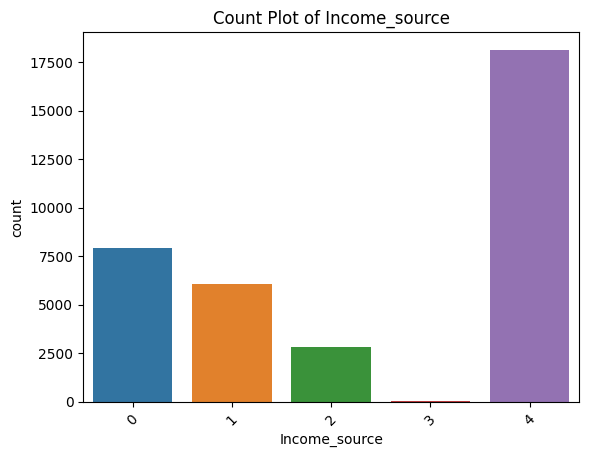

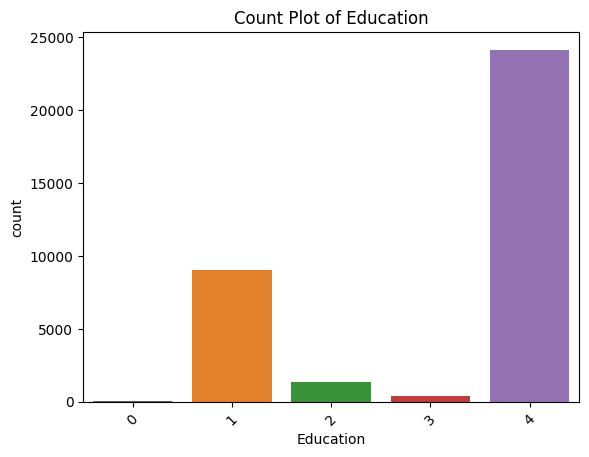

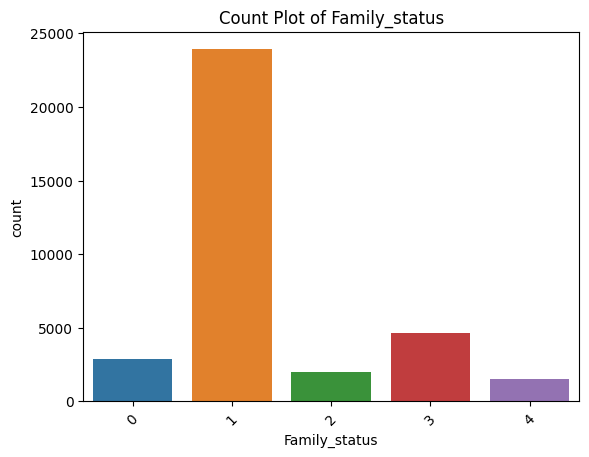

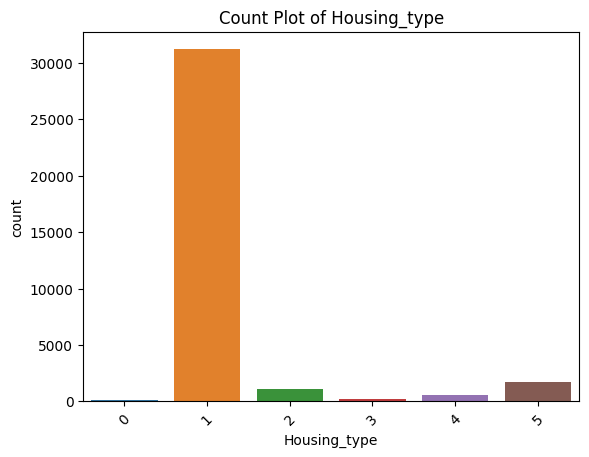

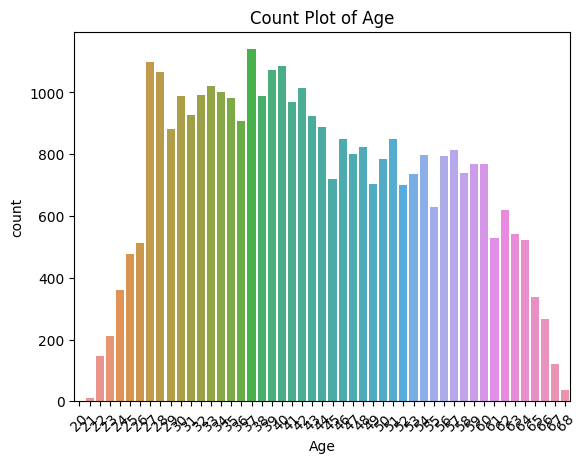

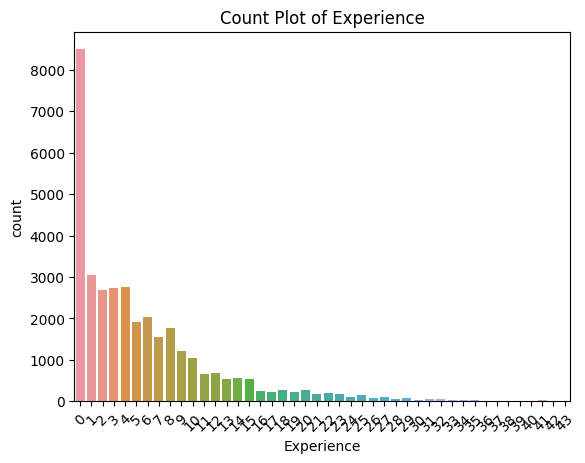

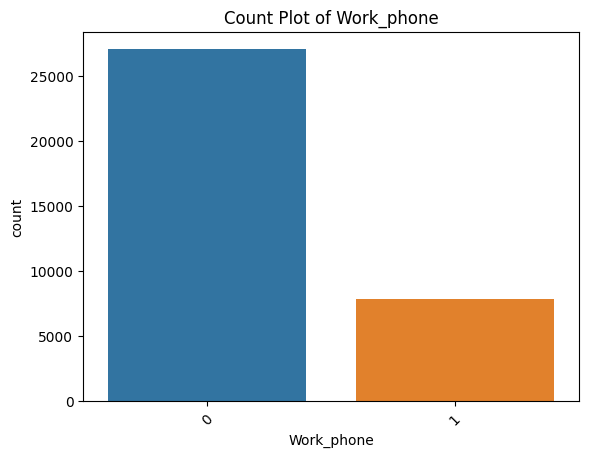

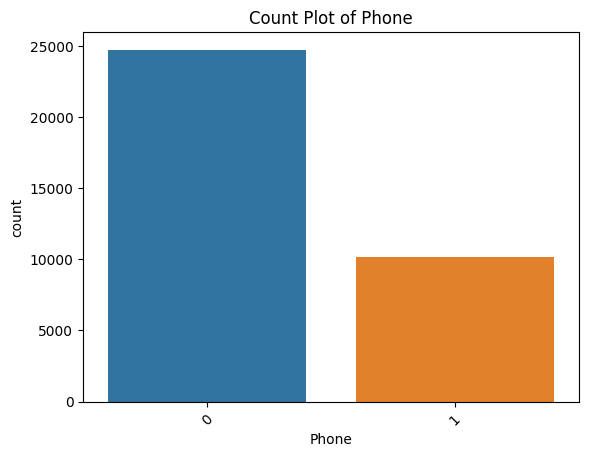

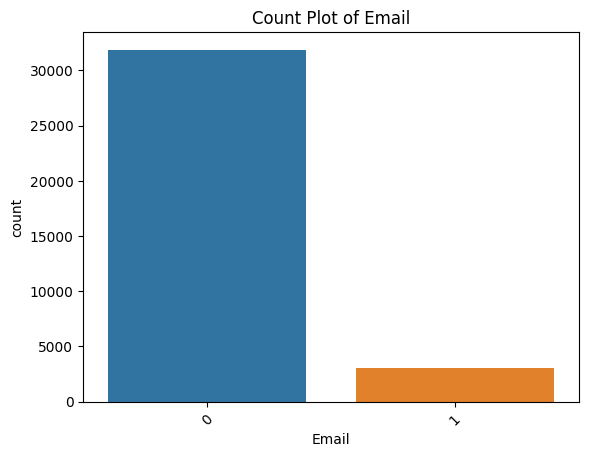

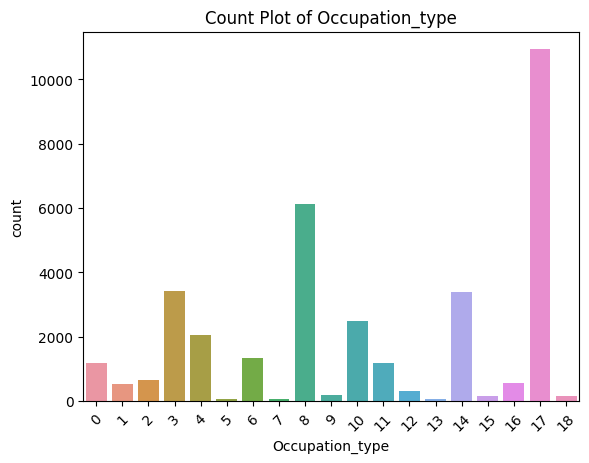

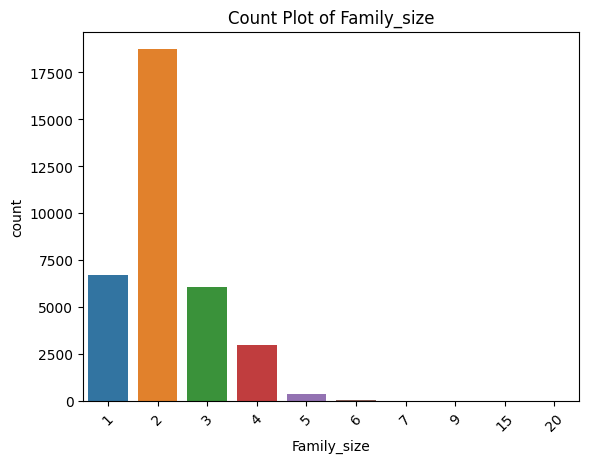

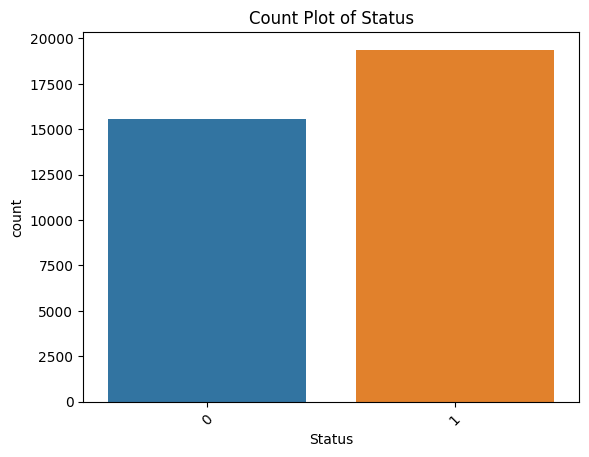

In [66]:
categorical_features = df.select_dtypes(include=['int64']).drop('ID', axis=1)
plt.figure(figsize=(12, 8))
for column in categorical_features.columns:
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()


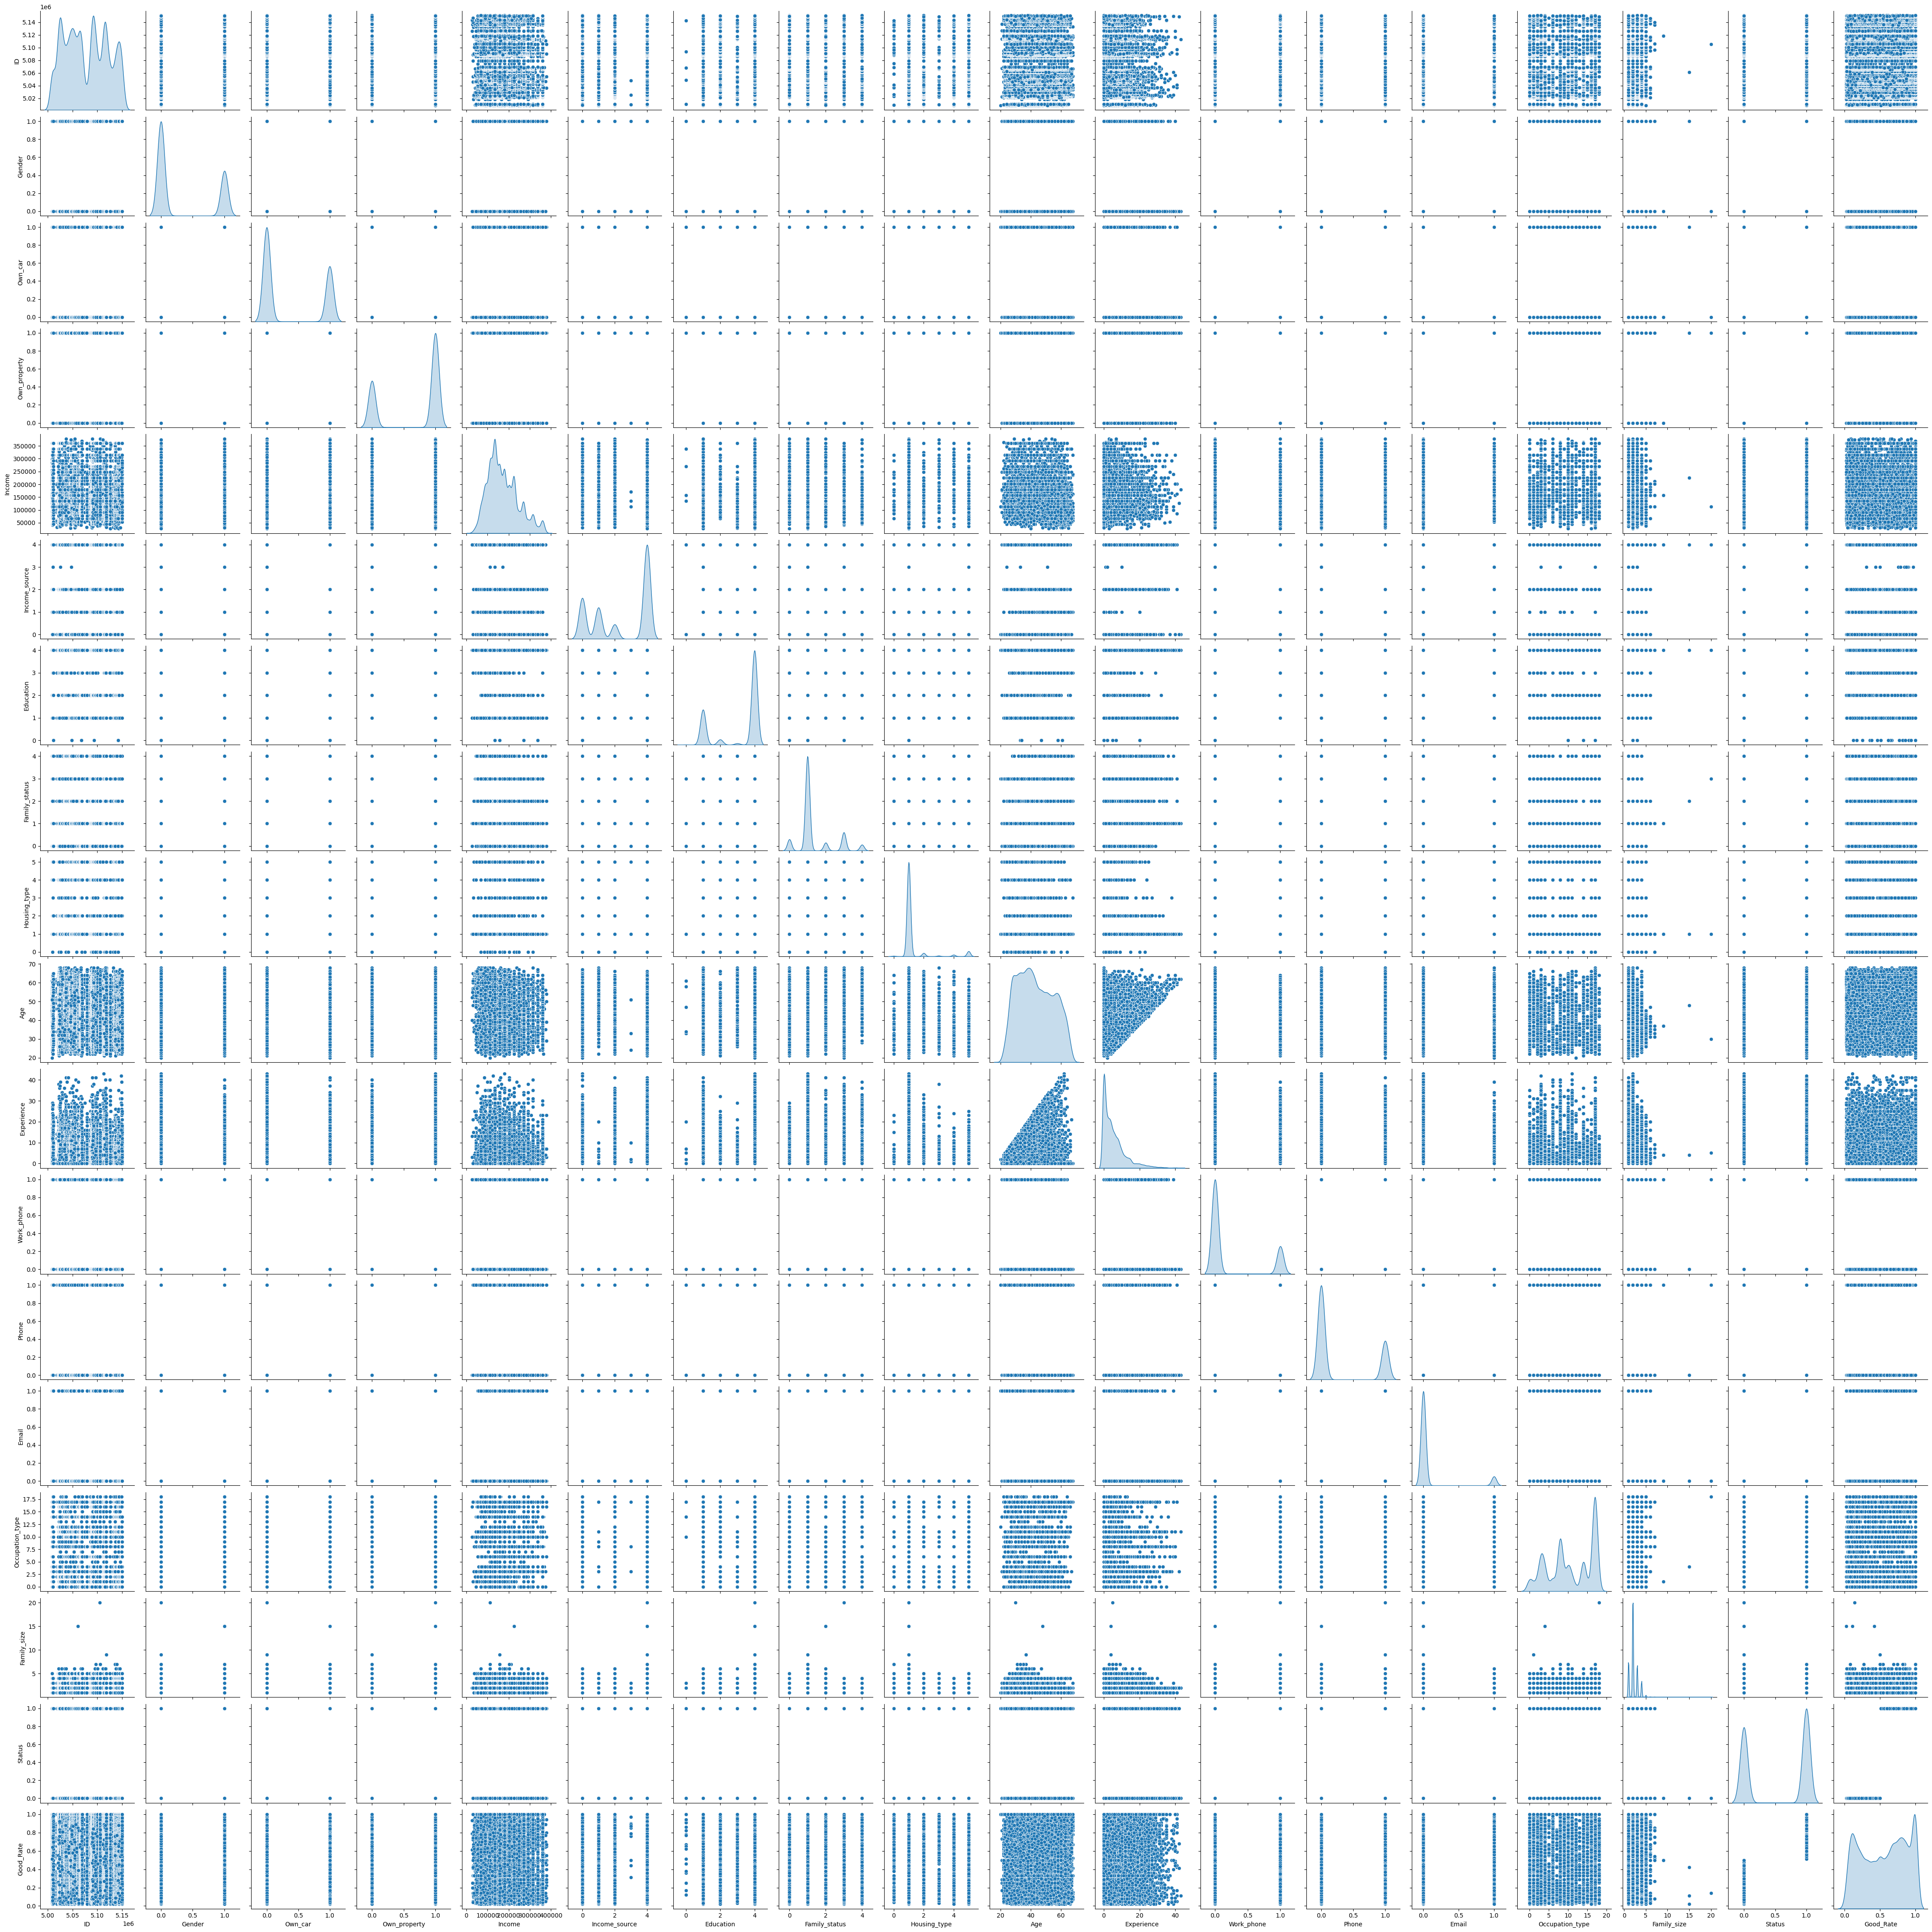

In [67]:
sns.pairplot(data=df, diag_kind='kde')
plt.show()

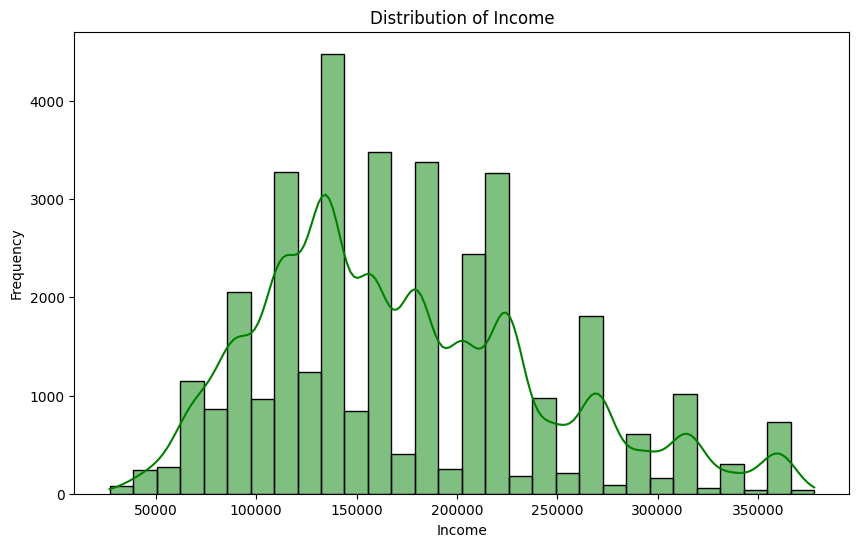

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=30, kde=True, color='green')
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

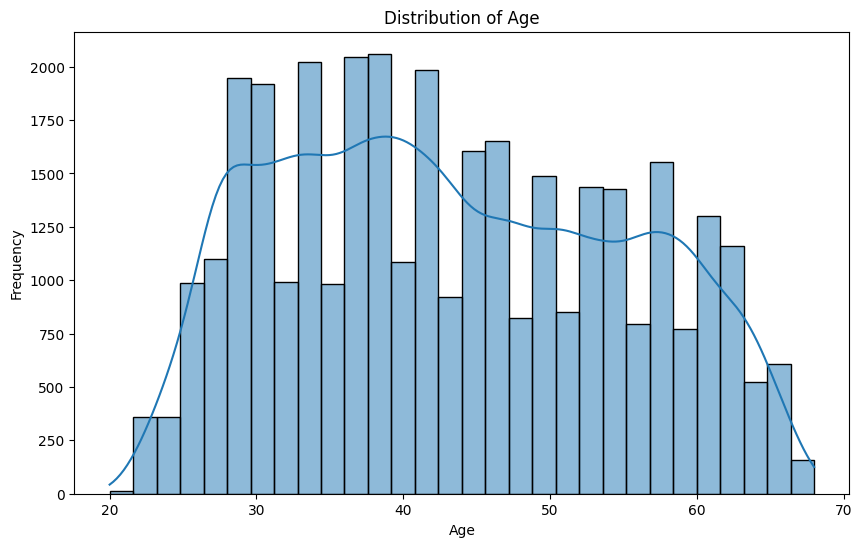

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


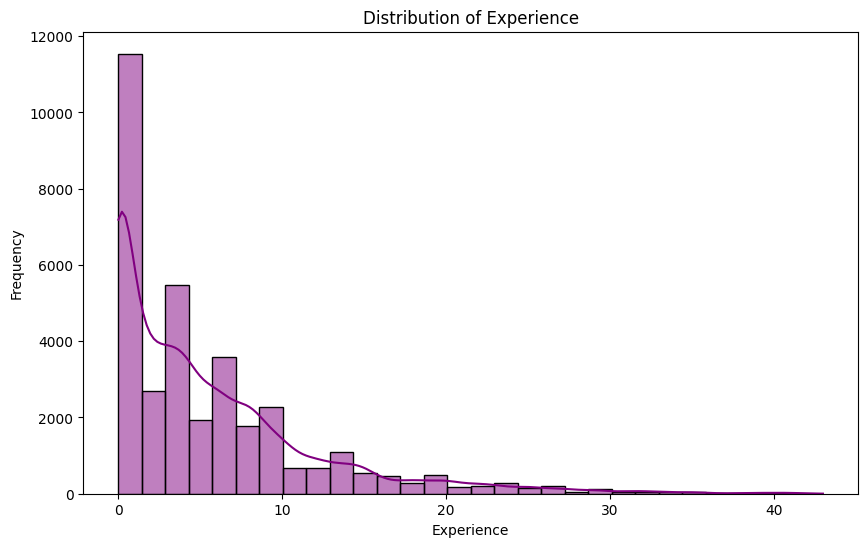

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Experience', bins=30, kde=True, color='purple')
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.ylabel("Frequency")
plt.show()


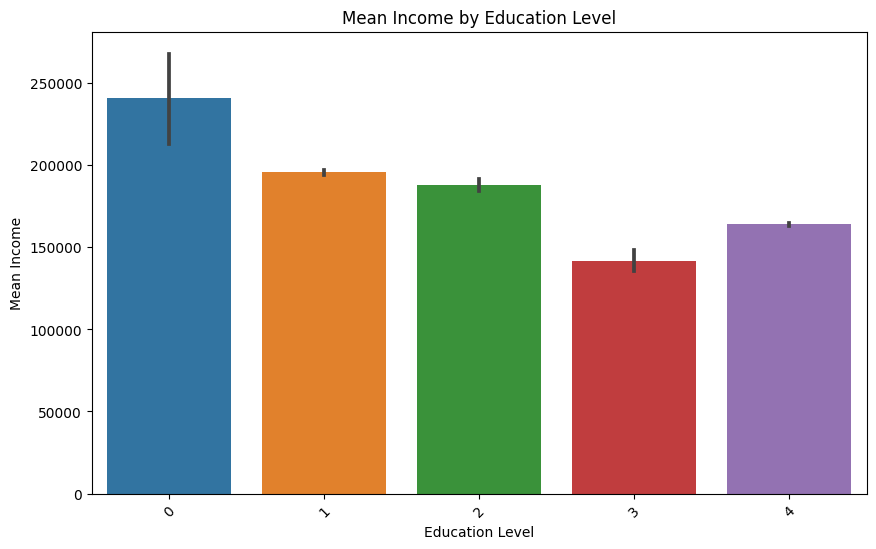

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Income', estimator='mean')
plt.title("Mean Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)
plt.show()


#### Dropping Housing_type on the basis of EDA as it majorly has only one type of values. Simlarly dropping email column as well as it is dominated by people who don't have email. Also dropping 'Phone','Work_phone' and 'Own_car' as well based on TRIAL and ERROR method on achieved accuracy

In [72]:
df.drop(columns=['Housing_type'], inplace=True)

In [ ]:
df.drop(columns=['Email'], inplace=True)

In [74]:
df = df.drop(['Phone', 'Work_phone','Own_car'], axis=1) 

In [76]:
# Test-Train with keeping Good_Rate column

from sklearn.model_selection import train_test_split
x = df.drop(['ID','Status'],axis = 1)
y = df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


In [77]:
from imblearn.over_sampling import SMOTE , ADASYN
sm = ADASYN()
x_train, y_train = sm.fit_resample(x_train,y_train)

In [78]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
x_train = power.fit_transform(x_train)
x_test = power.fit_transform(x_test)

In [79]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.fit_transform(x_test)


In [80]:
df.head(10)

ID  Gender  Own_property    Income  Income_source  Education  \
0  5008806       1             1  112500.0              4          4   
1  5008808       0             1  270000.0              0          4   
2  5008809       0             1  270000.0              0          4   
3  5008810       0             1  270000.0              0          4   
4  5008811       0             1  270000.0              0          4   
5  5008812       0             1  283500.0              1          1   
6  5008813       0             1  283500.0              1          1   
7  5008814       0             1  283500.0              1          1   
8  5008815       1             1  270000.0              4          1   
9  5112956       1             1  270000.0              4          1   

   Family_status  Age  Experience  Occupation_type  Family_size  Status  \
0              1   58           3               16            2       1   
1              3   52           8               14            1       1   
2              3   52           8               14            1       1   
3              3   52           8               14            1       1   
4              3   52           8               14            1       1   
5              2   61           0               17            1       0   
6              2   61           0               17            1       0   
7              2   61           0               17            1       0   
8              1   46           2                0            2       0   
9              1   46           2                0            2       0   

   Good_Rate  
0       0.77  
1       0.67  
2       1.00  
3       0.79  
4       0.85  
5       0.22  
6       0.22  
7       0.22  
8       0.14  
9       0.20

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a model on the resampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.986830804466075


## Hyper tuning the RF model

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest classifier instance
model_rf = RandomForestClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_pred_test = best_model.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred_test)

print("Best Parameters:", best_params)
print("Accuracy:", val_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.986830804466075


In [84]:
def Train_test(model):
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)

    # Calculate accuracy for train and test predictions
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

In [85]:
Train_test(model_rf)

Train Accuracy: 1.00
Test Accuracy: 0.99


## Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(x_train, y_train)

y_pred = model_nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9782421986830805


In [87]:
Train_test(model_nb)

Train Accuracy: 1.00
Test Accuracy: 0.98


## XGBoost

In [88]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.986830804466075


In [89]:
Train_test(model_xgb)

Train Accuracy: 1.00
Test Accuracy: 0.99


## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=5000)

model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9806756369882622


In [91]:
Train_test(model_lr)

Train Accuracy: 1.00
Test Accuracy: 0.98


## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(x_train, y_train)

y_pred = model_dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.986830804466075


In [93]:
Train_test(model_dt)

Train Accuracy: 1.00
Test Accuracy: 0.99


## MLP

In [94]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(verbose = 0 , max_iter = 5 , random_state = 0)
model_mlp.fit(x_train, y_train)
y_predict = model_mlp.predict(x_test)
print("Accuracy = " , accuracy_score(y_test, y_predict))

Accuracy =  0.9799599198396793


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [95]:
Train_test(model_mlp)

Train Accuracy: 1.00
Test Accuracy: 0.98


## Evaluation of Models

In [96]:
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    y_true = y_test
    y_pred = model.predict(x_test)
    
    accuracy = f"{accuracy_score(y_test, y_pred):0.2f}"
    precision = f"{precision_score(y_test, y_pred):0.2f}"
    recall = f"{recall_score(y_test, y_pred):0.2f}"
    f1 = f"{f1_score(y_test, y_pred):0.2f}"
    
    return accuracy, precision, recall, f1

In [97]:
models = [
    {"name": "RF", "model": model_rf},
    {"name": "NB", "model": model_nb},
    {"name": "XGB", "model": model_xgb},
    {"name": "LR", "model": model_lr},
    {"name": "DT", "model": model_dt},
    {"name": "MLP", "model": model_mlp}

]

print('-' * 72)
print(f"|{'Algo':^10}|{'Accuracy':^15}|{'Precision':^15}|{'Recall':^15}|{'F1':^10}|")
print('-' * 72)
for model_info in models:
    evaluation = evaluate_model(model_info['model'])
    print(f"|{model_info['name']:^10}|{evaluation[0]:^15}|{evaluation[1]:^15}|{evaluation[2]:^15}|{evaluation[3]:^10}|")
    
print('-' * 72)

------------------------------------------------------------------------
|   Algo   |   Accuracy    |   Precision   |    Recall     |    F1    |
------------------------------------------------------------------------
|    RF    |     0.99      |     1.00      |     0.98      |   0.99   |
|    NB    |     0.98      |     1.00      |     0.96      |   0.98   |
|   XGB    |     0.99      |     1.00      |     0.98      |   0.99   |
|    LR    |     0.98      |     1.00      |     0.96      |   0.98   |
|    DT    |     0.99      |     1.00      |     0.98      |   0.99   |
|   MLP    |     0.98      |     1.00      |     0.96      |   0.98   |
------------------------------------------------------------------------


In [353]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

models = {
    "modelDT.pkl": model_dt, 
    "modelXGB.pkl": model_xgb, 
    "modelRF.pkl": model_rf, 
    "modelNB.pkl": model_nb, 
    "modelLR.pkl": model_lr, 
    "modelMLP.pkl": model_mlp
}

for filename, model in models.items():
    save_model(model, filename)